In [2]:
import pandas as pd 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from scipy import stats
from dateutil import parser
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
import matplotlib.pyplot as plt

In [144]:
reviews = pd.read_csv('reviews.csv')

In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [17]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [145]:
reviews.dropna(subset =['comments'],how='any',axis=0,inplace=True)

In [19]:
import re 
import string 

In [20]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [21]:
reviews['comments'] = reviews['comments'].map(alphanumeric).map(punc_lower)

In [22]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighb...
3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aisuluomar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
import numpy as np

In [25]:
vectorizer = TfidfVectorizer(min_df=53, max_features=50, stop_words='english',ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(reviews['comments'])
print(feature_matrix.shape)


(84831, 50)


In [26]:
vader_polarity_compound = lambda s: (SentimentIntensityAnalyzer().polarity_scores(s))['compound']

In [35]:
#commenting it as it takes a long time to run 
reviews['polarity'] = reviews.comments.map(vader_polarity_compound)

In [36]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to every...,0.7717
1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...,0.9864
2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighb...,0.8625
3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...,0.8313
4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...,0.9776


In [37]:
reviews.to_csv('reviews_p.csv')

In [146]:
df_n = pd.read_csv('reviews_p.csv')

In [147]:
df_n.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
0,0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to every...,0.7717
1,1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...,0.9864
2,2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighb...,0.8625
3,3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...,0.8313
4,4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...,0.9776


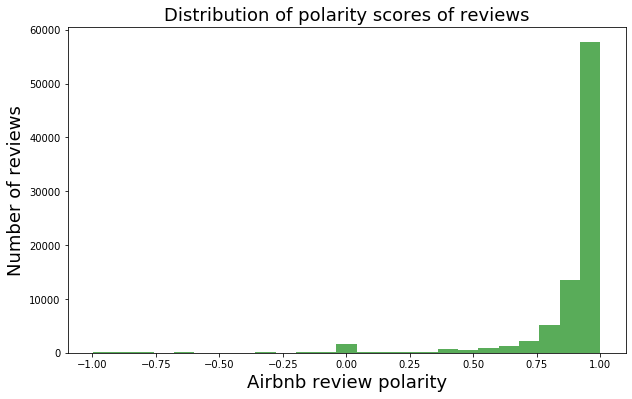

In [148]:
plt.figure(figsize=(10,6))
plt.hist(df_n.polarity, bins=25, color='g', alpha=0.65)
plt.title('Distribution of polarity scores of reviews',fontsize=18)
plt.xlabel('Airbnb review polarity',fontsize=18)
plt.ylabel('Number of reviews',fontsize=18);

In [99]:
import numpy as np

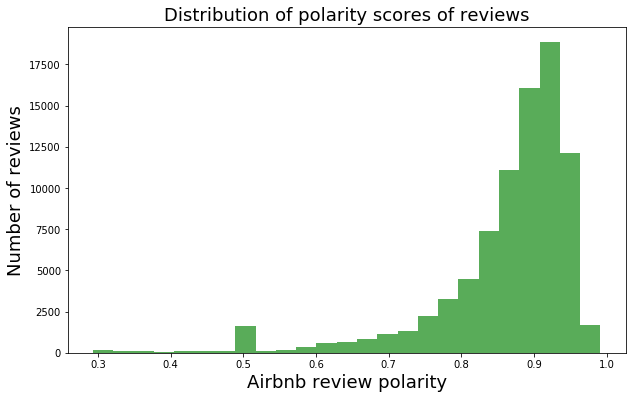

In [149]:
df_n['polarity'] = pol2 = (2 - np.sqrt(1-df_n.polarity))/2
plt.figure(figsize=(10,6))
plt.hist(pol2, bins=25, color='g', alpha=0.65)
plt.title('Distribution of polarity scores of reviews',fontsize=18)
plt.xlabel('Airbnb review polarity',fontsize=18)
plt.ylabel('Number of reviews',fontsize=18);

In [150]:
df_n.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
0,0,7202016,38917982,2015-07-19,28943674,Bianca,cute and cozy place perfect location to every...,0.761096
1,1,7202016,39087409,2015-07-20,32440555,Frank,kelly has a great room in a very central locat...,0.941690
2,2,7202016,39820030,2015-07-26,37722850,Ian,very spacious apartment and in a great neighb...,0.814595
3,3,7202016,40813543,2015-08-02,33671805,George,close to seattle center and all it has to offe...,0.794634
4,4,7202016,41986501,2015-08-10,34959538,Ming,kelly was a great host and very accommodating ...,0.925167


In [102]:
list(df_n[df_n['polarity'] < 0]['comments'])

[]

In [103]:
#def f(x):
#     if x['polarity'] < 0:
#         return 1
#     elif x['polarity'] >= 0 and x['polarity'] < 0.25:
#         return 2
#     elif x['polarity'] >= 0.25 and x['polarity'] < 0.50:
#         return 3
#     elif x['polarity'] >= 0.50 and x['polarity'] < 0.75:
#         return 4
#     else:
#         return 5

In [104]:
#df_n['polarity'] = df_n.apply(f, axis=1)

In [105]:
#list(df_n[df_n['polarity']  == 1]['comments'])

In [161]:
df_n[df_n['listing_id'] == 2197168]

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
41527,41539,2197168,10045530,2014-01-27,593308,Dana,this was indeed a delightful cottage near the ...,0.863802
41528,41540,2197168,10168739,2014-02-03,3034453,Tanya,loved my stay in seattle beacon hill tammi h...,0.918914
41529,41541,2197168,10327737,2014-02-13,2608359,Surya,tammi was a fabulous host she was very attent...,0.931080
41530,41542,2197168,10437344,2014-02-18,8925916,Suzy,tammi s cottage was everthing we were hoping f...,0.843955
41531,41543,2197168,10535100,2014-02-24,11329672,Golnaz,tammi s home is the perfect place to stay in s...,0.898265
41532,41544,2197168,10691748,2014-03-03,666801,Melanie,my stay with tammi was awesome her cottage w...,0.849917
41533,41545,2197168,11018172,2014-03-17,9442875,Kate,we had a lovely stay at the cottage it s in a...,0.942772
41534,41546,2197168,11219903,2014-03-25,7320478,Anne,we had a great stay here the house is actuall...,0.937151
41535,41547,2197168,11273287,2014-03-27,12519661,Lisa,thanks tammi for a fantastic get away home fo...,0.932546
41536,41548,2197168,11322412,2014-03-30,6967761,Matthew,beautiful place super comfortable great kitc...,0.921898


In [107]:
### Reccommender system using SVD and surprise Lab

In [108]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import KFold
from surprise import KNNBasic,KNNWithMeans
from surprise import accuracy
from surprise.model_selection import PredefinedKFold
from surprise.model_selection import train_test_split
from collections import defaultdict
import io
from surprise.model_selection import GridSearchCV
import csv
import os

In [109]:
df_r = df_n[['listing_id','reviewer_id','polarity']]

In [110]:
algo.predict(1,3).est

0.8621046740573681

In [111]:
df_r['predicted'] = np.vectorize(lambda a,b: algo.predict(a,b).est)(df_r.listing_id,df_r.reviewer_id)

In [116]:
df_r.nunique()

listing_id      3191
reviewer_id    75717
polarity        3689
predicted      66316
dtype: int64

In [117]:
### A reader is needed 

In [157]:
reader = Reader(rating_scale=(0,1))
data = Dataset.load_from_df(df_r,reader)

ValueError: too many values to unpack (expected 3)

In [158]:
raw_ratings = data.raw_ratings


In [159]:
raw_ratings

[(7202016, 28943674, 1.7610962536919943, None),
 (7202016, 32440555, 1.941690481051547, None),
 (7202016, 37722850, 1.8145950378226083, None),
 (7202016, 33671805, 1.7946344722208716, None),
 (7202016, 34959538, 1.9251668522645211, None),
 (7202016, 1154501, 1.8724264917782691, None),
 (7202016, 37853266, 1.8767117199406205, None),
 (7202016, 24445447, 1.9067262094691118, None),
 (7202016, 249583, 1.650214351352146, None),
 (7202016, 38110731, 1.8137877555046393, None),
 (7202016, 39852826, 1.887861692539971, None),
 (7202016, 384855, 1.877321558536147, None),
 (7202016, 21607838, 1.7487033625374186, None),
 (7202016, 17052263, 1.9086216655875146, None),
 (7202016, 4774006, 1.8183409787541505, None),
 (7202016, 41297839, 1.8570839407204356, None),
 (3946674, 9313038, 1.9327318797646313, None),
 (3946674, 8385649, 1.8660223899302575, None),
 (3946674, 9403201, 1.873015749007997, None),
 (3946674, 2920596, 1.8829530008928037, None),
 (3946674, 23579299, 1.8600893142036679, None),
 (39466

In [121]:
algo = SVD(verbose=True)
#Running 5-fold cv 
cross_validate(algo, data, measures=['RMSE','MAE'],cv=5, n_jobs=-1,verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1032  0.1037  0.1038  0.1032  0.1051  0.1038  0.0007  
MAE (testset)     0.0711  0.0709  0.0708  0.0707  0.0714  0.0710  0.0003  
Fit time          10.16   10.86   10.58   9.34    7.62    9.71    1.17    
Test time         0.36    0.36    0.34    0.20    0.17    0.29    0.08    


{'test_rmse': array([0.10320534, 0.10365726, 0.10380899, 0.1032475 , 0.10513059]),
 'test_mae': array([0.0710526 , 0.07086138, 0.07081878, 0.07070162, 0.0714252 ]),
 'fit_time': (10.158811092376709,
  10.86008596420288,
  10.583556175231934,
  9.337654113769531,
  7.6173460483551025),
 'test_time': (0.35976719856262207,
  0.3605778217315674,
  0.335864782333374,
  0.20107102394104004,
  0.17491602897644043)}

In [122]:
# let's do train-test-split, where test set is 25% of the ratings
trainset, testset = train_test_split(data, test_size=.25)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [123]:
uid = np.array([x[0] for x in testset])
iid = np.array([x[1] for x in testset])
score = np.array([x[2] for x in testset])

In [124]:
prediction2 = np.vectorize(algo.predict)(uid,iid)

In [125]:
prediction2[3]

array([0.91936308, 0.87102101, 0.83895292, ..., 0.84673051, 0.8324152 ,
       0.87647268])

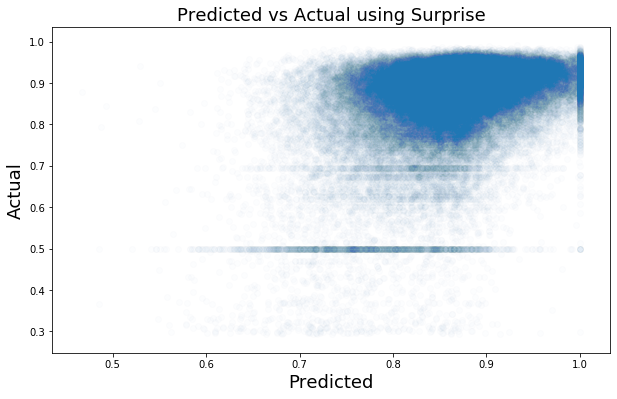

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(df_r['predicted'],df_r['polarity'] , alpha=0.01)
plt.title('Predicted vs Actual using Surprise',fontsize=18)
plt.xlabel('Predicted',fontsize=18)
plt.ylabel('Actual',fontsize=18);

In [127]:
accuracy.rmse(predictions)

RMSE: 0.1032


0.10316276688145068

In [172]:
def get_top3_recommendations(predictions, topN = 3):
     
    top_recs = defaultdict(list)
    for iid, uid, true_r, est, _ in predictions:
        top_recs[uid].append((iid, est))
     
    for iid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:topN]    
    return top_recs
print('getting top 3 recommendations')


getting top 3 recommendations


In [173]:
top3_recommendations = get_top3_recommendations(predictions,3)

print('Total predictions calculated are %d' % len(predictions))

Total predictions calculated are 21208


In [174]:
dfo = pd.DataFrame(columns=['UserId', 'Recommended Listing,Rating'])
i = 0                           
for uid, user_ratings in top3_recommendations.items():
    #print(uid, top3_recommendations[uid])
    row = [uid, top3_recommendations[uid]]
    dfo.loc[i] = row
    i=i+1

dfo.to_csv('submissionF.csv', index = False)

print("wrote Recommendations for each user in csv file")

wrote Recommendations for each user in csv file


In [178]:
for row in dfo['Recommended Listing,Rating']:
    zip(*row)

In [179]:
dfo[['Recommended Listing1']] = pd.DataFrame(dfo['Recommended Listing,Rating'].tolist(), index=dfo.index)

ValueError: Columns must be same length as key

In [ ]:
dfo.to_csv('submissionFF.csv', index = False)

In [177]:
dfo.head(20)

,UserId,"Recommended Listing,Rating"
0,44097594,"[(2197168, 0.9193630792045624)]"
1,1649187,"[(1163345, 0.8710210137407801), (189156, 0.849..."
2,23531341,"[(6168975, 0.8389529169713434)]"
3,41489078,"[(2187906, 0.8054912710452473)]"
4,2441255,"[(67270, 0.8603913756780301)]"
5,30478029,"[(3890990, 0.860069227607962)]"
6,11830887,"[(692671, 0.8834324400399289)]"
7,817509,"[(774659, 0.8844269791665591)]"
8,2564872,"[(6646894, 0.8218510480485715)]"
9,3677530,"[(190984, 0.8467305137362455)]"


In [169]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(dfo.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dfo.UserId, dfo['Recommended Listing,Rating']],
               fill_color='lavender',
               align='left'))
])

fig.show()

KeyError: 'Recommended Listing,Rating'

In [137]:
from plotly import graph_objs as go


In [ ]:
fig.show()

In [71]:
plotly.offline.init_notebook_mode(connected=True)

In [70]:
import plotly